In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import timeit
import os


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def knn_predict(X_train, y_train, X_test, k=3, use_mkl=False):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    y_pred = np.zeros(num_test, dtype=int)

    if use_mkl:
     
        dists = -2 * np.dot(X_test, X_train.T) + np.sum(X_train**2, axis=1) + np.sum(X_test**2, axis=1)[:, np.newaxis]
        dists = np.sqrt(dists)
    else:
        
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))


    for i in range(num_test):
        closest_y = y_train[np.argsort(dists[i])[:k]]
        y_pred[i] = np.bincount(closest_y).argmax()

    return y_pred

results = {}


time_no_mkl = timeit.timeit("knn_predict(X_train, y_train, X_test, use_mkl=False)", globals=globals(), number=1)
y_pred_no_mkl = knn_predict(X_train, y_train, X_test, use_mkl=False)
accuracy_no_mkl = accuracy_score(y_test, y_pred_no_mkl)
results["No MKL"] = {"time": time_no_mkl, "accuracy": accuracy_no_mkl}


time_with_mkl = timeit.timeit("knn_predict(X_train, y_train, X_test, use_mkl=True)", globals=globals(), number=1)
y_pred_with_mkl = knn_predict(X_train, y_train, X_test, use_mkl=True)
accuracy_with_mkl = accuracy_score(y_test, y_pred_with_mkl)
results["With MKL"] = {"time": time_with_mkl, "accuracy": accuracy_with_mkl}


print("Results:")
for label, result in results.items():
    print(f"{label}:")
    print(f"  Time taken: {result['time']:.6f} seconds")
    print(f"  Accuracy: {result['accuracy'] * 100:.2f}%")
    print()




Results:
No MKL:
  Time taken: 0.010161 seconds
  Accuracy: 100.00%

With MKL:
  Time taken: 0.000195 seconds
  Accuracy: 100.00%



Results:
No MKL:
  Time taken: 0.000157 seconds
  Accuracy: 100.00%
  Predictions: [1 2 2 0 1 0]

With MKL:
  Time taken: 0.000022 seconds
  Accuracy: 100.00%
  Predictions: [1 2 2 0 1 0]

Actual labels:     [1. 2. 2. 0. 1. 0.]
Predicted labels without MKL: [1 2 2 0 1 0]
Predicted labels with MKL:    [1 2 2 0 1 0]


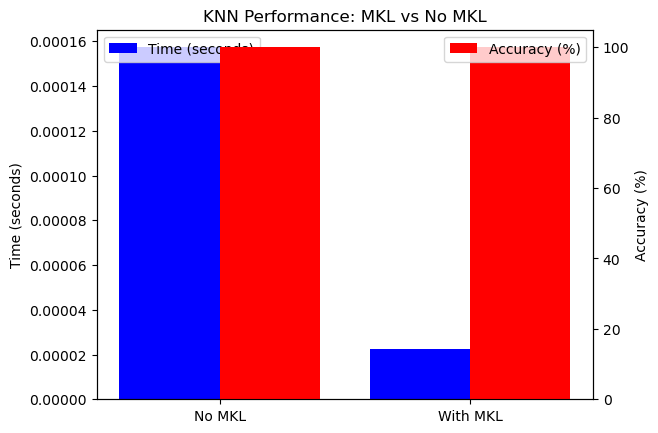

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import timeit
import os
import matplotlib.pyplot as plt


data = [
    [1.0, 1.0, 0], [1.2, 1.1, 0], [1.1, 1.3, 0], [1.3, 1.2, 0], [1.1, 1.4, 0],
    [4.0, 4.0, 1], [4.2, 4.1, 1], [4.1, 4.3, 1], [4.3, 4.2, 1], [4.1, 4.4, 1],
    [7.0, 7.0, 2], [7.2, 7.1, 2], [7.1, 7.3, 2], [7.3, 7.2, 2], [7.1, 7.4, 2]
]

data = np.array(data)
X = data[:, :-1]  
y = data[:, -1]   


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


def knn_predict(X_train, y_train, X_test, k=3, use_mkl=False):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    y_pred = np.zeros(num_test, dtype=int)

    if use_mkl:
       
        dists = -2 * np.dot(X_test, X_train.T) + np.sum(X_train**2, axis=1) + np.sum(X_test**2, axis=1)[:, np.newaxis]
        dists = np.sqrt(dists)
    else:
        
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j])**2))

  
    for i in range(num_test):
        closest_y = y_train[np.argsort(dists[i])[:k]]
        y_pred[i] = np.bincount(closest_y.astype(int)).argmax()

    return y_pred


warm_up_iterations = 5
for _ in range(warm_up_iterations):
    knn_predict(X_train, y_train, X_test, use_mkl=True)
    knn_predict(X_train, y_train, X_test, use_mkl=False)

results = {}

time_no_mkl = timeit.timeit("knn_predict(X_train, y_train, X_test, use_mkl=False)", globals=globals(), number=10) / 10
y_pred_no_mkl = knn_predict(X_train, y_train, X_test, use_mkl=False)
accuracy_no_mkl = accuracy_score(y_test, y_pred_no_mkl)
results["No MKL"] = {"time": time_no_mkl, "accuracy": accuracy_no_mkl, "predictions": y_pred_no_mkl}


time_with_mkl = timeit.timeit("knn_predict(X_train, y_train, X_test, use_mkl=True)", globals=globals(), number=10) / 10
y_pred_with_mkl = knn_predict(X_train, y_train, X_test, use_mkl=True)
accuracy_with_mkl = accuracy_score(y_test, y_pred_with_mkl)
results["With MKL"] = {"time": time_with_mkl, "accuracy": accuracy_with_mkl, "predictions": y_pred_with_mkl}

print("Results:")
for label, result in results.items():
    print(f"{label}:")
    print(f"  Time taken: {result['time']:.6f} seconds")
    print(f"  Accuracy: {result['accuracy'] * 100:.2f}%")
    print(f"  Predictions: {result['predictions']}")
    print()

print("Actual labels:    ", y_test)
print("Predicted labels without MKL:", y_pred_no_mkl)
print("Predicted labels with MKL:   ", y_pred_with_mkl)


labels = ['No MKL', 'With MKL']
times = [results['No MKL']['time'], results['With MKL']['time']]
accuracies = [results['No MKL']['accuracy'] * 100, results['With MKL']['accuracy'] * 100]

x = np.arange(len(labels))

fig, ax1 = plt.subplots()


ax1.bar(x - 0.2, times, 0.4, label='Time (seconds)', color='b')
ax1.set_ylabel('Time (seconds)')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.bar(x + 0.2, accuracies, 0.4, label='Accuracy (%)', color='r')
ax2.set_ylabel('Accuracy (%)')
ax2.legend(loc='upper right')

plt.title('KNN Performance: MKL vs No MKL')
plt.show()


In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import timeit


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', n_jobs=-1)


start_time = timeit.default_timer()
knn.fit(X_train, y_train)
end_time = timeit.default_timer()
print(f"Time without MKL: {end_time - start_time} seconds")


start_time = timeit.default_timer()
knn.fit(X_train, y_train)
end_time = timeit.default_timer()
print(f"Time with MKL: {end_time - start_time} seconds")


y_pred = knn.predict(X_test)
print("Accuracy:", np.mean(y_pred == y_test))

Time without MKL: 0.003367208002600819 seconds
Time with MKL: 0.000399874996219296 seconds
Accuracy: 1.0
